## 1: Import Packages

In [1]:
import matplotlib
import numpy as np
from qiskit import(
    QuantumCircuit,
    execute,
    Aer)
from qiskit.visualization import plot_histogram

* `QuantumCircuit`: instructions of the quantum system. It holds quantum operations.
* `execute`: runs circuit.
* `Aer`: handles simulator backends.
* `plot_histogram`: creates histograms.

## 2: Initialize Variables

In [2]:
circuit = QuantumCircuit(2,2)
#initializing with 2 qubits in the zero state

## 3: Add Gates

In [3]:
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])

The gates are added to the circuit one-by-one to form the Bell state

|ψ⟩=(|00⟩+|11⟩)/√2.

* `QuantumCircuit.h(0)`: A Hadamard gate ***H*** on qubit 0, which puts it into a **superposition state**.
* `QuantumCircuit.cx(0, 1)`: A controlled-Not operation (***Cx***) on control qubit 0 and target qubit 1, putting the qubits in an **entagled state**.
* `QuantumCircuit.measure([0,1], [0,1])`: Passing quantum and classical registers to `measure`. The ith qubit's measurement result will be stored in the ith classical bit.


## 4: Visualize the Circuit

Use `QuantumCircuit.draw()` to view the circuit that you have designed.

In [4]:
circuit.draw()

┌───┐     ┌─┐   
q_0: |0>┤ H ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

## 5: Simulate the Experiment

Simulating using `qasm_simulator` each run of which will yield the bit  string either 00 or 11.

In [5]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=2048)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal counts:", counts)


Total counts: {'11': 1024, '00': 1024}


As expected, the output bit string is 00 approximately 50 percent of the time. The number of times circuit is run can be specified via `shots` argument of the `execute` method. Default number of shots is 1024.

Once a `result` object is initialised we can access the counts via the method `get_counts(circuit)`. This gives us the aggregate outcomes of the experiment.

## 6: Visualize the Results

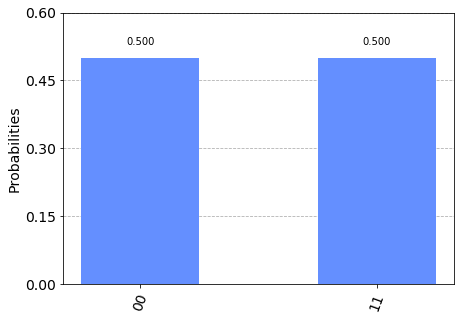

In [6]:
plot_histogram(counts)